In [493]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import xgboost as xgb

# Metrics and Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Miscellaneous
import random
import re
from datetime import datetime, timedelta

# Explainable AI
import shap
shap.initjs()

In [494]:
df = pd.read_csv('listings.csv')

In [495]:
df.columns

Index(['main_title', 'date', 'location', 'bedrooms', 'bathrooms',
       'half_bathrooms', 'area', 'plot_area', 'price', 'description', 'floor',
       'condition', 'property_type', 'agency_name', 'neighborhood', 'city',
       'state'],
      dtype='object')

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51991 entries, 0 to 51990
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_title      51948 non-null  object 
 1   date            51948 non-null  object 
 2   location        51945 non-null  object 
 3   bedrooms        46604 non-null  float64
 4   bathrooms       47589 non-null  float64
 5   half_bathrooms  51991 non-null  float64
 6   area            48052 non-null  float64
 7   plot_area       51991 non-null  float64
 8   price           51668 non-null  float64
 9   description     51988 non-null  object 
 10  floor           51991 non-null  float64
 11  condition       17692 non-null  object 
 12  property_type   51948 non-null  object 
 13  agency_name     51948 non-null  object 
 14  neighborhood    51945 non-null  object 
 15  city            51825 non-null  object 
 16  state           51364 non-null  object 
dtypes: float64(7), object(10)
memor

In [497]:
df.isna().sum()

main_title           43
date                 43
location             46
bedrooms           5387
bathrooms          4402
half_bathrooms        0
area               3939
plot_area             0
price               323
description           3
floor                 0
condition         34299
property_type        43
agency_name          43
neighborhood         46
city                166
state               627
dtype: int64

In [498]:
df.describe()

,bedrooms,bathrooms,half_bathrooms,area,plot_area,price,floor
count,46604.000000,47589.000000,51991.000000,48052.000000,51991.000000,5.166800e+04,51991.000000
mean,2.851729,2.328563,0.165144,197.680013,82.082187,1.189721e+07,0.903464
std,3.611927,1.550220,0.491240,172.692190,171.319002,2.036853e+08,18.456239
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,2.000000,2.000000,0.000000,80.000000,0.000000,1.115369e+06,0.000000
50%,3.000000,2.000000,0.000000,134.000000,0.000000,4.400000e+06,0.000000
75%,3.000000,3.000000,0.000000,260.000000,96.000000,1.000000e+07,0.000000
max,300.000000,100.000000,25.000000,998.000000,999.000000,3.400000e+10,2000.000000


In [499]:
# Drop rows without price (target variable)
df = df[~df['price'].isna()]

# Impute bedrooms and bathrooms using k-NN

In [500]:
# Initialize variables to store the results
best_mae_bedrooms = float('inf')
best_k_bedrooms = 0

best_mae_bathrooms = float('inf')
best_k_bathrooms = 0

# Loop through different values of k
for k in range(1, 21):  # Adjust the range based on your computational capacity
    print(f"Evaluating k={k}...")
    
    # Initialize the KNN Imputer with the current k
    knn_imputer = KNNImputer(n_neighbors=k)
    
    # Evaluate MAE for 'bedrooms'
    _, mae_errors_bedrooms = leave_one_out_validation(data_to_validate, 'bedrooms', n_samples=100)  # Adjust n_samples based on your computational capacity
    avg_mae_bedrooms = round(np.mean(mae_errors_bedrooms),3)
    
    # Evaluate MAE for 'bathrooms'
    _, mae_errors_bathrooms = leave_one_out_validation(data_to_validate, 'bathrooms', n_samples=100)  # Adjust n_samples based on your computational capacity
    avg_mae_bathrooms = round(np.mean(mae_errors_bathrooms),3)
    
    print(f"Average MAE for bedrooms with k={k}: {avg_mae_bedrooms}")
    print(f"Average MAE for bathrooms with k={k}: {avg_mae_bathrooms}")
    
    # Update best parameters for 'bedrooms'
    if avg_mae_bedrooms < best_mae_bedrooms:
        best_mae_bedrooms = avg_mae_bedrooms
        best_k_bedrooms = k
    
    # Update best parameters for 'bathrooms'
    if avg_mae_bathrooms < best_mae_bathrooms:
        best_mae_bathrooms = avg_mae_bathrooms
        best_k_bathrooms = k

print(f"Optimal k for bedrooms is {best_k_bedrooms} with MAE {best_mae_bedrooms}")
print(f"Optimal k for bathrooms is {best_k_bathrooms} with MAE {best_mae_bathrooms}")


Evaluating k=1...
Average MAE for bedrooms with k=1: 0.781
Average MAE for bathrooms with k=1: 0.674
Evaluating k=2...
Average MAE for bedrooms with k=2: 0.984
Average MAE for bathrooms with k=2: 0.52
Evaluating k=3...
Average MAE for bedrooms with k=3: 0.595
Average MAE for bathrooms with k=3: 0.514
Evaluating k=4...
Average MAE for bedrooms with k=4: 0.976
Average MAE for bathrooms with k=4: 0.537
Evaluating k=5...
Average MAE for bedrooms with k=5: 0.589
Average MAE for bathrooms with k=5: 0.639
Evaluating k=6...
Average MAE for bedrooms with k=6: 0.569
Average MAE for bathrooms with k=6: 0.584
Evaluating k=7...
Average MAE for bedrooms with k=7: 0.506
Average MAE for bathrooms with k=7: 0.98
Evaluating k=8...
Average MAE for bedrooms with k=8: 0.599
Average MAE for bathrooms with k=8: 0.581
Evaluating k=9...
Average MAE for bedrooms with k=9: 0.565
Average MAE for bathrooms with k=9: 0.588
Evaluating k=10...
Average MAE for bedrooms with k=10: 0.593
Average MAE for bathrooms with k

In [501]:
# Initialize KNN imputers with optimal k values
knn_imputers = {
    'bedrooms': KNNImputer(n_neighbors=best_k_bedrooms),
    'bathrooms': KNNImputer(n_neighbors=best_k_bathrooms)
}

# Prepare data and perform imputation for each feature
for feature, k in zip(['bedrooms', 'bathrooms'], [best_k_bedrooms, best_k_bathrooms]):
    temp_df = df[['area', feature]].copy()
    temp_df = pd.DataFrame(knn_imputers[feature].fit_transform(temp_df), columns=['area', feature])
    df[feature] = temp_df[feature]

In [502]:
df.isna().sum()

main_title            0
date                  0
location              3
bedrooms            323
bathrooms           323
half_bathrooms        0
area               3869
plot_area             0
price                 0
description           0
floor                 0
condition         34047
property_type         0
agency_name           0
neighborhood          3
city                123
state               582
dtype: int64

# Impute 'area' using k-NN

In [503]:
# Initialize variables to store the best MAE and k for 'area'
best_mae_area = float('inf')
best_k_area = 0

# Loop through different values of k
for k in range(1, 21):  # Adjust the range based on your computational capacity
    print(f"Evaluating k={k}...")
    
    # Initialize the KNN Imputer with the current k
    knn_imputer = KNNImputer(n_neighbors=k)
    
    # Prepare data for imputation, now including 'area'
    data_to_validate = df[['area', 'bedrooms', 'bathrooms', 'half_bathrooms']].dropna().copy()
    
    # Evaluate MAE for 'area'
    _, mae_errors = leave_one_out_validation(data_to_validate, 'area', n_samples=100)  # Adjust n_samples based on your computational capacity
    avg_mae = round(np.mean(mae_errors), 3)
    
    print(f"Average MAE for area with k={k}: {avg_mae}")
    
    # Update best parameters for 'area'
    if avg_mae < best_mae_area:
        best_mae_area = avg_mae
        best_k_area = k

print(f"Optimal k for area is {best_k_area} with MAE {best_mae_area}")


Evaluating k=1...
Average MAE for area with k=1: 140.02
Evaluating k=2...
Average MAE for area with k=2: 138.87
Evaluating k=3...
Average MAE for area with k=3: 105.847
Evaluating k=4...
Average MAE for area with k=4: 142.212
Evaluating k=5...
Average MAE for area with k=5: 106.96
Evaluating k=6...
Average MAE for area with k=6: 142.44
Evaluating k=7...
Average MAE for area with k=7: 137.479
Evaluating k=8...
Average MAE for area with k=8: 132.859
Evaluating k=9...
Average MAE for area with k=9: 127.419
Evaluating k=10...
Average MAE for area with k=10: 128.988
Evaluating k=11...
Average MAE for area with k=11: 138.923
Evaluating k=12...
Average MAE for area with k=12: 112.365
Evaluating k=13...
Average MAE for area with k=13: 125.519
Evaluating k=14...
Average MAE for area with k=14: 120.849
Evaluating k=15...
Average MAE for area with k=15: 145.123
Evaluating k=16...
Average MAE for area with k=16: 128.66
Evaluating k=17...
Average MAE for area with k=17: 127.971
Evaluating k=18...
A

In [504]:
# Initialize KNN imputer for 'area' with optimal k
knn_imputer_area = KNNImputer(n_neighbors=best_k_area)

# Prepare data and perform imputation for 'area'
temp_df = df[['area', 'bedrooms', 'bathrooms', 'half_bathrooms']].copy()
temp_df = pd.DataFrame(knn_imputer_area.fit_transform(temp_df), columns=['area', 'bedrooms', 'bathrooms', 'half_bathrooms'])
df['area'] = temp_df['area']

In [505]:
df.isna().sum()

main_title            0
date                  0
location              3
bedrooms            323
bathrooms           323
half_bathrooms        0
area                323
plot_area             0
price                 0
description           0
floor                 0
condition         34047
property_type         0
agency_name           0
neighborhood          3
city                123
state               582
dtype: int64

# Drop the ones that can't be imputed

In [506]:
df = df[~df['bedrooms'].isna()]

In [507]:
df.isna().sum()

main_title            0
date                  0
location              3
bedrooms              0
bathrooms             0
half_bathrooms        0
area                  0
plot_area             0
price                 0
description           0
floor                 0
condition         33864
property_type         0
agency_name           0
neighborhood          3
city                123
state               582
dtype: int64

# Extract features from 'description' field

In [508]:
# Dictionary of terms to check. Keys are new column names, values are lists of terms to flag for that column.
terms_to_check = {
    'has_piscina_alberca': ['piscina', 'alberca'],
    'has_jardín': ['jardín'],
    'has_vista_sala_amplio_iluminado': ['vista', 'sala', 'amplio', 'iluminado'],
    'has_nueva_nuevo': ['nueva', 'nuevo'],
    'has_remodelado_renovado': ['remodelado', 'renovado'],
    'has_calefaccion_aire': ['calefacción', 'aire acondicionado'],
    'has_lavanderia': ['lavandería'],
    'has_departamento': ['departamento'],
    'has_terreno': ['terreno'],
    'has_loft': ['loft'],
    'has_recamaras': ['recámaras'],
    'has_bano': ['baño'],
    'has_cocina': ['cocina'],
    'has_balcon': ['balcón'],
    'has_gimnasio': ['gimnasio'],
    'has_elevador': ['elevador'],
    'has_estacionamiento': ['estacionamiento'],
    'has_cisterna': ['cisterna'],
    'has_seguridad': ['seguridad'],
    'has_mascotas': ['mascotas'],
    'has_tinacos': ['tinacos'],
    'has_roofgarden': ['roofgarden', 'roof garden'],
    'has_piso': ['piso'],
    'has_terraza': ['terraza'],
    'has_amueblado': ['amueblado'],
    'has_preventa': ['preventa'],
    'has_mantenimiento': ['mantenimiento']
}

# Function to apply to the 'description' column
def check_terms(description, terms):
    return int(any(term.lower() in description.lower() for term in terms))

# Adding new binary columns based on the presence of terms
for new_col_name, terms in terms_to_check.items():
    df[new_col_name] = df['description'].apply(lambda x: check_terms(x, terms))


In [509]:
column_sums = df[list(terms_to_check.keys())].sum()
column_sums

has_piscina_alberca                 7411
has_jardín                          6844
has_vista_sala_amplio_iluminado    26385
has_nueva_nuevo                     5440
has_remodelado_renovado             1459
has_calefaccion_aire                1297
has_lavanderia                      1904
has_departamento                   25957
has_terreno                         4430
has_loft                             546
has_recamaras                      13077
has_bano                           29534
has_cocina                         23449
has_balcon                          5933
has_gimnasio                        8383
has_elevador                        8405
has_estacionamiento                25613
has_cisterna                        2077
has_seguridad                      10379
has_mascotas                        2280
has_tinacos                          204
has_roofgarden                      6287
has_piso                           11904
has_terraza                        11017
has_amueblado   

# Analyse target variable (price)

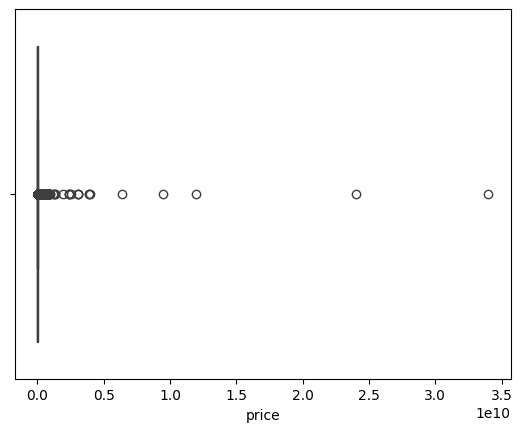

In [510]:
sns.boxplot(x=df['price'])
plt.show()


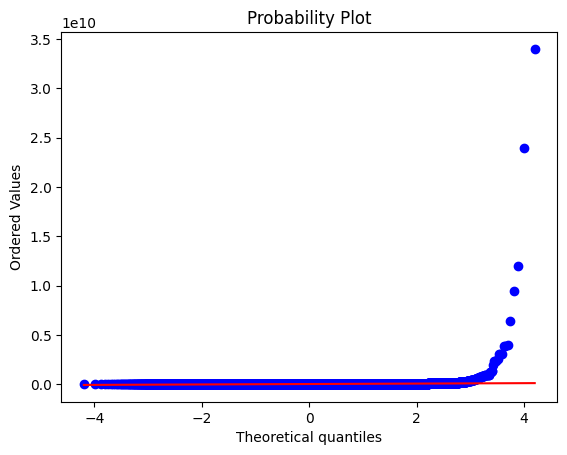

In [511]:
import scipy.stats as stats

stats.probplot(df['price'], plot=plt)
plt.show()

# Remove outliers

In [512]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [513]:
df.loc[:, 'log_price'] = np.log1p(df['price'])

scaler = StandardScaler()
df.loc[:, 'scaled_log_price'] = scaler.fit_transform(df[['log_price']])

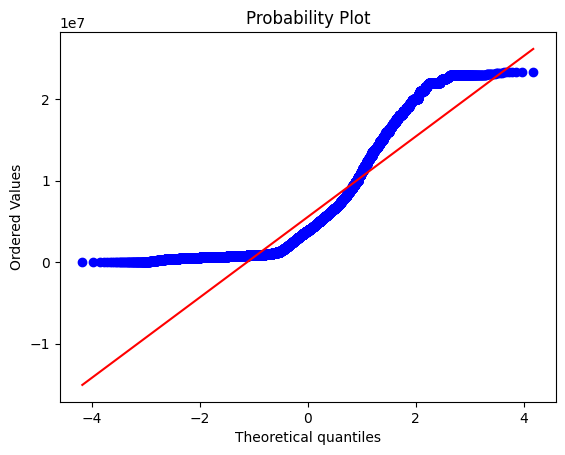

In [514]:
stats.probplot(df['price'], plot=plt)
plt.show()

In [515]:
# Calculate IQR for bedrooms
Q1_bedrooms = df['bedrooms'].quantile(0.25)
Q3_bedrooms = df['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Calculate IQR for bathrooms
Q1_bathrooms = df['bathrooms'].quantile(0.25)
Q3_bathrooms = df['bathrooms'].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Calculate IQR for bathrooms
Q1_half_bathrooms = df['half_bathrooms'].quantile(0.25)
Q3_half_bathrooms = df['half_bathrooms'].quantile(0.75)
IQR_half_bathrooms = Q3_half_bathrooms - Q1_half_bathrooms

# Filter out outliers
df = df[~((df['bedrooms'] < (Q1_bedrooms - 1.5 * IQR_bedrooms)) | 
          (df['bedrooms'] > (Q3_bedrooms + 1.5 * IQR_bedrooms)))]

df = df[~((df['bathrooms'] < (Q1_bathrooms - 1.5 * IQR_bathrooms)) | 
          (df['bathrooms'] > (Q3_bathrooms + 1.5 * IQR_bathrooms)))]

df = df[~((df['half_bathrooms'] < (Q1_half_bathrooms - 1.5 * IQR_half_bathrooms)) | 
          (df['half_bathrooms'] > (Q3_half_bathrooms + 1.5 * IQR_half_bathrooms)))]

# Frequency encode agency_name and neighborhood

In [516]:
agency_name_unique_count = df['agency_name'].nunique()
neighborhood_unique_count = df['neighborhood'].nunique()

print(f"Unique count of agency_name: {agency_name_unique_count}")
print(f"Unique count of neighborhood: {neighborhood_unique_count}")

Unique count of agency_name: 1968
Unique count of neighborhood: 322


In [517]:
for column in ['agency_name', 'neighborhood']:
    freq_encoding = df[column].value_counts(normalize=True)
    df.loc[:, column + '_freq'] = df[column].map(freq_encoding)

In [518]:
df.head()

,main_title,date,location,bedrooms,bathrooms,half_bathrooms,area,plot_area,price,description,...,has_roofgarden,has_piso,has_terraza,has_amueblado,has_preventa,has_mantenimiento,log_price,scaled_log_price,agency_name_freq,neighborhood_freq
0,Departamento En Venta En La Colonia Roma Sur,17 jun. 2023 - Publicado por OSCAR DEL VALLE B...,"Roma Sur, Cuauhtémoc, Ciudad de México",3.000000,1.0,0.0,55.0,0.0,2200000.0,Se vende un encantador departamento de 55.00 m...,...,0,0,0,0,0,1,14.603968,-0.332722,0.000926,0.013176
1,Preventa Dic24 Loft En Roma Sur,27 sep. 2023 - Publicado por Santiago C Asesor...,"Roma Sur, Cuauhtémoc, Ciudad de México",1.000000,1.0,0.0,42.0,0.0,2990000.0,"ROMA SUR , PREVENTA LOFT EN DESARROLLO NUEVO D...",...,1,1,0,0,1,0,14.910784,-0.066192,0.000212,0.013176
2,Vive Feliz En La Roma Sur,"Hace 1 semana, 4 días - Publicado por CGC Bien...","Roma Sur, Cuauhtémoc, Ciudad de México",3.000000,3.0,0.0,148.0,0.0,8990000.0,"Comodidad, tranquilidad y facilidad para sali...",...,1,0,0,0,0,0,16.011624,0.890103,0.002751,0.013176
3,Terreno En Venta Para Desarrollar Roma Sur,6 jul. 2023 - Publicado por José Reynaldo Peña,"Roma Sur, Cuauhtémoc, Ciudad de México",3.571429,2.0,0.0,232.0,232.0,10900000.0,EXCELENTE TERRENO EN VENTA CON USO DE SUELO H3...,...,0,0,0,0,0,0,16.204273,1.057458,0.000053,0.013176
4,Departamento En Venta En Roma Sur,9 jun. 2023 - Publicado por ACI Bienes Raíces,"Roma Sur, Cuauhtémoc, Ciudad de México",3.000000,1.0,0.0,89.0,0.0,3200000.0,"Se vende departamento en la Colonia Roma Sur, ...",...,0,1,1,0,0,0,14.978662,-0.007227,0.000132,0.013176


In [519]:
df = df.drop(['main_title', 'city', 'state', 'location', 'description'], axis=1)

# Process date field and generate days_since_earliest

In [520]:
df['date'].head()

0    17 jun. 2023 - Publicado por OSCAR DEL VALLE B...
1    27 sep. 2023 - Publicado por Santiago C Asesor...
2    Hace 1 semana, 4 días - Publicado por CGC Bien...
3       6 jul. 2023 - Publicado por José Reynaldo Peña
4        9 jun. 2023 - Publicado por ACI Bienes Raíces
Name: date, dtype: object

In [521]:
df['date'].str.split('-',expand=True)[0].head()

0             17 jun. 2023 
1             27 sep. 2023 
2    Hace 1 semana, 4 días 
3              6 jul. 2023 
4              9 jun. 2023 
Name: 0, dtype: object

In [522]:
# Convert 'date' column to string type (if necessary)
df['date'] = df['date'].astype(str)

# Extract the date part from the string
df['extracted_date'] = df['date'].str.split('-',expand=True)[0].str.strip()

# Replace Spanish month abbreviations with English ones
month_map = {
    'ene.': 'Jan', 
    'feb.': 'Feb', 
    'mar.': 'Mar', 
    'abr.': 'Apr', 
    'may.': 'May', 
    'jun.': 'Jun', 
    'jul.': 'Jul', 
    'ago.': 'Aug', 
    'sep.': 'Sep', 
    'oct.': 'Oct', 
    'nov.': 'Nov', 
    'dic.': 'Dec'
}
for spanish_month, english_month in month_map.items():
    df['extracted_date'] = df['extracted_date'].str.replace(spanish_month, english_month)

def convert_relative_to_absolute(date_string, reference_date):
    if 'Hace' in date_string:
        weeks = days = 0
        if 'semana' in date_string:
            weeks = int(re.search(r'(\d+) semana', date_string).group(1))
        if 'día' in date_string:
            days = int(re.search(r'(\d+) día', date_string).group(1))
        delta = timedelta(weeks=weeks, days=days)
        return reference_date - delta
    else:
        return None

def convert_to_datetime(date_str, reference_date_str='22 Oct 2023'):
    try:
        return pd.to_datetime(date_str, format='%d %b %Y', errors='raise')
    except:
        reference_date = pd.to_datetime(reference_date_str, format='%d %b %Y')
        return convert_relative_to_absolute(date_str, reference_date)

# Convert the extracted_date to datetime format
df['datetime'] = df['extracted_date'].apply(convert_to_datetime)

# Calculate days_since_earliest
earliest_date = df['datetime'].min()
df['days_since_earliest'] = (df['datetime'] - earliest_date).dt.days


In [523]:
df[['date','extracted_date','datetime','days_since_earliest']].tail()

,date,extracted_date,datetime,days_since_earliest
51662,2 jun. 2023 - Publicado por DIMA Real Estate B...,2 Jun 2023,2023-06-02,836
51663,15 sep. 2023 - Publicado por Zona R&G,15 Sep 2023,2023-09-15,941
51664,25 abr. 2023 - Publicado por Zona R&G,25 Apr 2023,2023-04-25,798
51665,23 may. 2023 - Publicado por German Contreras ...,23 May 2023,2023-05-23,826
51667,7 jun. 2023 - Publicado por Latitud Inmobiliaria,7 Jun 2023,2023-06-07,841


# Impute nulls in condition field

In [524]:
df.condition.value_counts()

condition
Excelente          3686
Bueno              2820
second_hand        1182
new                1137
normal              959
semi_new            710
in_construction     130
renovated           104
to_renew             50
semi_renovated       24
ruin                  1
Name: count, dtype: int64

In [525]:
df['condition'].fillna('normal', inplace=True)

In [526]:
df.isna().sum()

date                               0
bedrooms                           0
bathrooms                          0
half_bathrooms                     0
area                               0
plot_area                          0
price                              0
floor                              0
condition                          0
property_type                      0
agency_name                        0
neighborhood                       2
has_piscina_alberca                0
has_jardín                         0
has_vista_sala_amplio_iluminado    0
has_nueva_nuevo                    0
has_remodelado_renovado            0
has_calefaccion_aire               0
has_lavanderia                     0
has_departamento                   0
has_terreno                        0
has_loft                           0
has_recamaras                      0
has_bano                           0
has_cocina                         0
has_balcon                         0
has_gimnasio                       0
h

In [527]:
df.dropna(inplace=True)

# One hot encode property type

In [528]:
df.property_type.value_counts()

property_type
Departamento                 28024
Casa                          6296
Oficina                        852
Lote / Terreno                 827
Condominio Horizontal          626
Tienda / Local Comercial       375
Casa en Condominio             238
Penthouse                      150
Edificio                       132
Nave Industrial / Bodega        96
Casa en Fraccionamiento         86
Loft                            29
Lote Comercial                  28
Dúplex                          10
Local en Centro Comercial        8
Estudio                          7
Entretenimiento / Hotel          4
Villa                            4
Consultorio Médico               3
Quinta / Hacienda                2
Name: count, dtype: int64

In [529]:
df = pd.get_dummies(df, columns=['property_type'], drop_first=True)

# Label encode condition

In [530]:
le = LabelEncoder()
df['condition_encoded'] = le.fit_transform(df['condition'])
df.drop('condition', axis=1, inplace=True) 

In [531]:
df.head()

,date,bedrooms,bathrooms,half_bathrooms,area,plot_area,price,floor,agency_name,neighborhood,...,property_type_Loft,property_type_Lote / Terreno,property_type_Lote Comercial,property_type_Nave Industrial / Bodega,property_type_Oficina,property_type_Penthouse,property_type_Quinta / Hacienda,property_type_Tienda / Local Comercial,property_type_Villa,condition_encoded
0,17 jun. 2023 - Publicado por OSCAR DEL VALLE B...,3.000000,1.0,0.0,55.0,0.0,2200000.0,0.0,OSCAR DEL VALLE BIENES RAÍCES,Roma Sur,...,False,False,False,False,False,False,False,False,False,4
1,27 sep. 2023 - Publicado por Santiago C Asesor...,1.000000,1.0,0.0,42.0,0.0,2990000.0,1.0,Santiago C Asesor Inmobiliario,Roma Sur,...,True,False,False,False,False,False,False,False,False,3
2,"Hace 1 semana, 4 días - Publicado por CGC Bien...",3.000000,3.0,0.0,148.0,0.0,8990000.0,0.0,CGC Bienes Raices,Roma Sur,...,False,False,False,False,False,False,False,False,False,4
3,6 jul. 2023 - Publicado por José Reynaldo Peña,3.571429,2.0,0.0,232.0,232.0,10900000.0,0.0,José Reynaldo Peña,Roma Sur,...,False,True,False,False,False,False,False,False,False,4
4,9 jun. 2023 - Publicado por ACI Bienes Raíces,3.000000,1.0,0.0,89.0,0.0,3200000.0,0.0,ACI Bienes Raíces,Roma Sur,...,False,False,False,False,False,False,False,False,False,4


# Remove unnecessary columns

In [532]:
df = df.select_dtypes(exclude='object')

In [533]:
df = df.select_dtypes(exclude=['datetime64[ns]'])

In [534]:
def convert_bool_to_int(column):
    return column.astype(int)

# Convert DateTime columns and Boolean columns in the dataframe
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = convert_bool_to_int(df[col])

# Train regression model

In [535]:
df.columns

Index(['bedrooms', 'bathrooms', 'half_bathrooms', 'area', 'plot_area', 'price',
       'floor', 'has_piscina_alberca', 'has_jardín',
       'has_vista_sala_amplio_iluminado', 'has_nueva_nuevo',
       'has_remodelado_renovado', 'has_calefaccion_aire', 'has_lavanderia',
       'has_departamento', 'has_terreno', 'has_loft', 'has_recamaras',
       'has_bano', 'has_cocina', 'has_balcon', 'has_gimnasio', 'has_elevador',
       'has_estacionamiento', 'has_cisterna', 'has_seguridad', 'has_mascotas',
       'has_tinacos', 'has_roofgarden', 'has_piso', 'has_terraza',
       'has_amueblado', 'has_preventa', 'has_mantenimiento', 'log_price',
       'scaled_log_price', 'agency_name_freq', 'neighborhood_freq',
       'days_since_earliest', 'property_type_Casa en Condominio',
       'property_type_Casa en Fraccionamiento',
       'property_type_Condominio Horizontal',
       'property_type_Consultorio Médico', 'property_type_Departamento',
       'property_type_Dúplex', 'property_type_Edificio',
  

In [536]:
X = df.drop(['scaled_log_price','price','log_price'], axis=1)  # Dropping the target variable to form feature matrix
y = df['scaled_log_price']  # Target variable

In [537]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model using metrics like MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for scaled_log_price: {mse}')
print(f'R-squared for scaled_log_price: {r2}')

# View the coefficients to interpret feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Mean Squared Error for scaled_log_price: 0.5941825259393058
R-squared for scaled_log_price: 0.4019163382446811
                                    Feature   Coefficient
33                         agency_name_freq  1.120736e+01
34                        neighborhood_freq  2.325569e+00
47             property_type_Lote / Terreno  1.163570e+00
48             property_type_Lote Comercial  1.060042e+00
53   property_type_Tienda / Local Comercial  7.520715e-01
49   property_type_Nave Industrial / Bodega  6.600067e-01
42                   property_type_Edificio  5.823895e-01
50                    property_type_Oficina  3.968728e-01
51                  property_type_Penthouse  3.961240e-01
29                              has_terraza  3.346288e-01
38      property_type_Condominio Horizontal  3.192011e-01
17                                 has_bano  2.981658e-01
14                              has_terreno  2.475575e-01
41                     property_type_Dúplex  2.438073e-01
6                  

# I would expect Area to be more important. Let's try transforming it

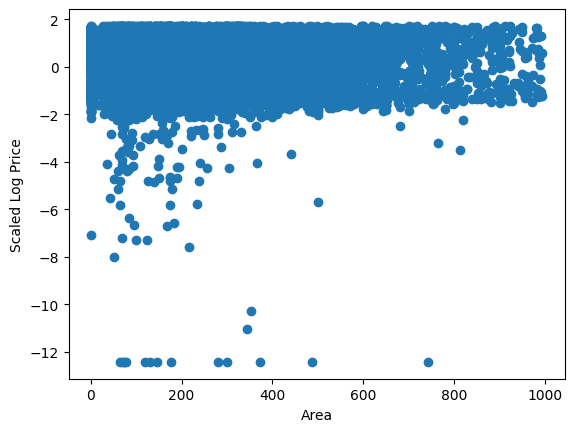

In [538]:
plt.scatter(df['area'], df['scaled_log_price'])
plt.xlabel('Area')
plt.ylabel('Scaled Log Price')
plt.show()


In [539]:
df['log_area'] = np.log(df['area'] + 1)
df['log_plot_area'] = np.log(df['plot_area'] + 1)

In [540]:
X = df.drop(['scaled_log_price','price','log_price'], axis=1)  # Dropping the target variable to form feature matrix
y = df['scaled_log_price']  # Target variable

In [541]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model using metrics like MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for scaled_log_price: {mse}')
print(f'R-squared for scaled_log_price: {r2}')

# View the coefficients to interpret feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Mean Squared Error for scaled_log_price: 0.592715938225759
R-squared for scaled_log_price: 0.40339255491499937
                                    Feature   Coefficient
33                         agency_name_freq  1.206954e+01
34                        neighborhood_freq  2.295638e+00
47             property_type_Lote / Terreno  1.131004e+00
48             property_type_Lote Comercial  1.046833e+00
53   property_type_Tienda / Local Comercial  7.233662e-01
49   property_type_Nave Industrial / Bodega  6.100703e-01
42                   property_type_Edificio  5.333269e-01
50                    property_type_Oficina  3.586416e-01
29                              has_terraza  3.293747e-01
51                  property_type_Penthouse  3.279852e-01
38      property_type_Condominio Horizontal  3.082909e-01
17                                 has_bano  3.005975e-01
14                              has_terreno  2.375001e-01
6                       has_piscina_alberca  2.236501e-01
10                 

In [542]:
# Adding a constant term for the intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [543]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       scaled_log_price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     471.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:51:02   Log-Likelihood:                -42809.
No. Observations:               37797   AIC:                         8.573e+04
Df Residuals:                   37739   BIC:                         8.623e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Create interaction features

In [544]:
# Interaction between log_area and property_types
property_types = [col for col in df.columns if 'property_type_' in col]
for prop in property_types:
    df[f'log_area:{prop}'] = df['log_area'] * df[prop]

# Interaction between bedrooms and bathrooms
df['bedrooms:bathrooms'] = df['bedrooms'] * df['bathrooms']

# Interaction between has_terreno and area
df['has_terreno:area'] = df['has_terreno'] * df['area']

# Interaction among features indicating amenities
df['has_gimnasio:has_elevador'] = df['has_gimnasio'] * df['has_elevador']
df['has_gimnasio:has_estacionamiento'] = df['has_gimnasio'] * df['has_estacionamiento']
df['has_elevador:has_estacionamiento'] = df['has_elevador'] * df['has_estacionamiento']

# Generate polynomial features

In [545]:
import numpy as np
import pandas as pd

def detect_non_linearity(data, feature, response):
    # Calculate the correlation between the feature and the response
    original_corr = np.abs(data[feature].corr(data[response]))
    
    # Calculate the correlation between the squared feature and the response
    squared_corr = np.abs(np.square(data[feature]).corr(data[response]))
    
    # If the squared correlation is substantially different from the original correlation,
    # it indicates potential non-linearity.
    if squared_corr > 1.5 * original_corr:
        return True
    return False

def generate_polynomial_features(data, response):
    generated_features = []
    
    for feature in data.columns:
        # Exclude the response variable from the loop
        if feature != response:
            if detect_non_linearity(data, feature, response):
                # If non-linearity is detected, add polynomial terms
                data[f"{feature}_squared"] = np.square(data[feature])
                data[f"{feature}_cubed"] = np.power(data[feature], 3)
                
                # Append to generated_features list
                generated_features.append((feature, f"{feature}_squared", f"{feature}_cubed"))

    # Print out results
    print("Features detected as having non-linear relationship with the response:")
    for orig, squared, cubed in generated_features:
        print(f"Original Feature: {orig} -> Generated Polynomial Features: {squared}, {cubed}")

    return data

# Assuming your response variable is 'scaled_log_price' and data is your dataframe
df = generate_polynomial_features(df, 'scaled_log_price')


invalid value encountered in divide
invalid value encountered in divide


Features detected as having non-linear relationship with the response:
Original Feature: plot_area -> Generated Polynomial Features: plot_area_squared, plot_area_cubed
Original Feature: log_area:property_type_Edificio -> Generated Polynomial Features: log_area:property_type_Edificio_squared, log_area:property_type_Edificio_cubed


In [546]:
X = df.drop(['scaled_log_price','price','log_price'], axis=1)  # Dropping the target variable to form feature matrix
y = df['scaled_log_price']  # Target variable

# XGBoost

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [548]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [549]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.41619454285490154


In [550]:
r2 = r2_score(y_test, y_pred)

print(f'R^2 value: {r2}')

R^2 value: 0.5824196966832531


In [551]:
# Create a Tree explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a sample (or all) of your test data
shap_values = explainer.shap_values(X_test)


[13:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


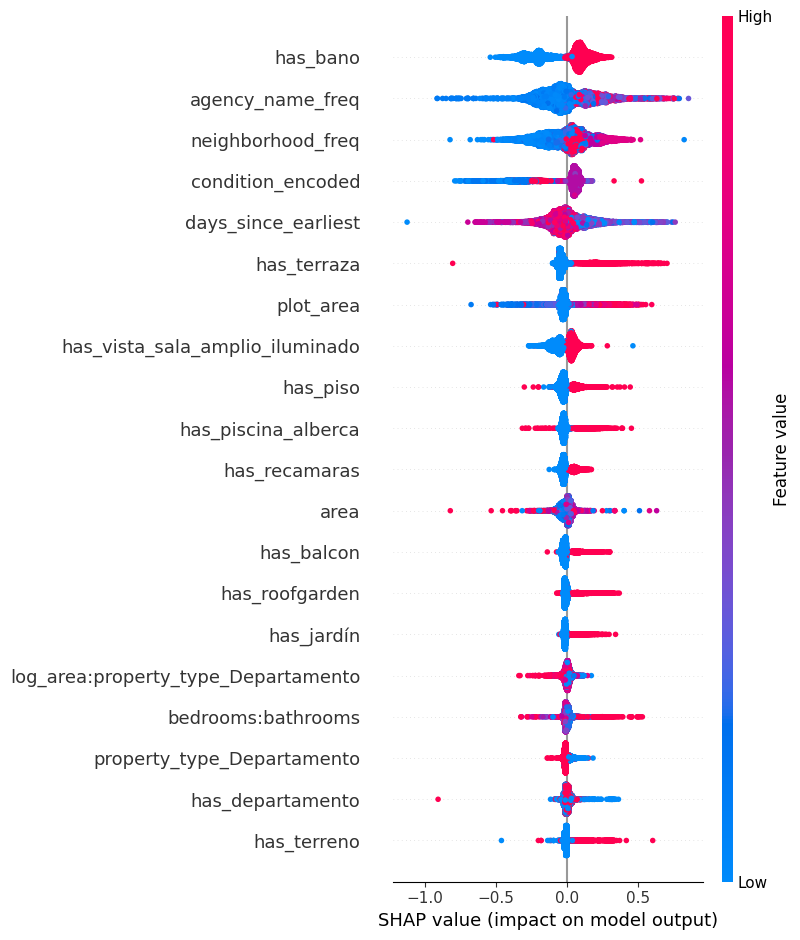

In [552]:
# For a summary of feature importances
shap.summary_plot(shap_values, X_test)

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify features with low SHAP values (you can set your threshold)
# This is a speculative threshold and can be adjusted based on your needs
threshold = 0.01
low_importance_features = [feature for feature, importance in zip(X.columns, model.feature_importances_) if importance < threshold]

# Drop these features
X = X.drop(columns=low_importance_features)

# Check for multicollinearity using variance inflation factors (VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X)
print(vif_data)

# Drop features with VIF > 10 (common threshold, but you can adjust)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X = X.drop(columns=high_vif_features)


In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [433]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, 10],
#     'n_estimators': [100, 500, 1000],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
# }

# grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_selected, y)

# best_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)


In [434]:
# print("Best Parameters:", grid_search.best_params_)

### Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.8}

In [477]:
# Using the best parameters to initialize the XGBoost model
optimized_model = xgb.XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.01,
    max_depth=10,
    n_estimators=1000,
    subsample=0.8
)

# Fit the model on the selected features
optimized_model.fit(X, y)

# Drop low importance and high VIF features from the test set
# X_test_selected = X_test.drop(columns=low_importance_features)
# X_test_selected = X_test_selected.drop(columns=high_vif_features)

# Predict and evaluate on the test set
y_pred_optimized = optimized_model.predict(X_test)  # Make sure X_test has the same selected features as X_selected
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model MSE: {mse_optimized}")
print(f"Optimized Model R^2: {r2_optimized}")

Optimized Model MSE: 0.16022566320889364
Optimized Model R^2: 0.8326836488999978


In [478]:
from sklearn.model_selection import cross_val_score

# Using the same optimized model parameters
cv_scores = cross_val_score(optimized_model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

# Print cross-validation scores and average
print(f"R^2 scores for each fold: {cv_scores}")
print(f"Average R^2 score: {cv_scores.mean()}")


R^2 scores for each fold: [0.65173162 0.62195773 0.634192   0.64910721 0.58410601]
Average R^2 score: 0.628218912977043


In [479]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Adjust regularization parameters
optimized_model_reg = xgb.XGBRegressor(
    colsample_bytree=0.7, 
    learning_rate=0.01, 
    max_depth=10, 
    n_estimators=1000, 
    subsample=0.8,
    alpha=0.1,    # Example value for L1 regularization
    reg_lambda=1  # Corrected parameter name for L2 regularization
)

# Fit the model
optimized_model_reg.fit(X_train, y_train)

# Compute the cross-validation scores
cv_scores_reg = cross_val_score(optimized_model_reg, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"Regularized R^2 scores for each fold: {cv_scores_reg}")
print(f"Average Regularized R^2 score: {cv_scores_reg.mean()}")


Regularized R^2 scores for each fold: [0.61849241 0.6427651  0.6257308  0.67013913 0.65474392]
Average Regularized R^2 score: 0.6423742704433456


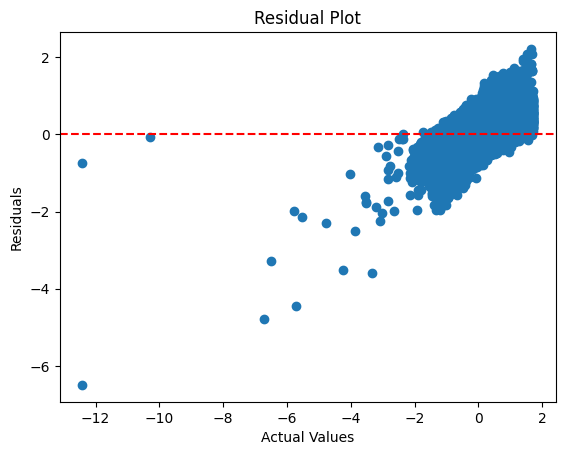

In [480]:
# Calculate residuals
residuals = y_test - y_pred_optimized

# Plotting residuals
import matplotlib.pyplot as plt

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


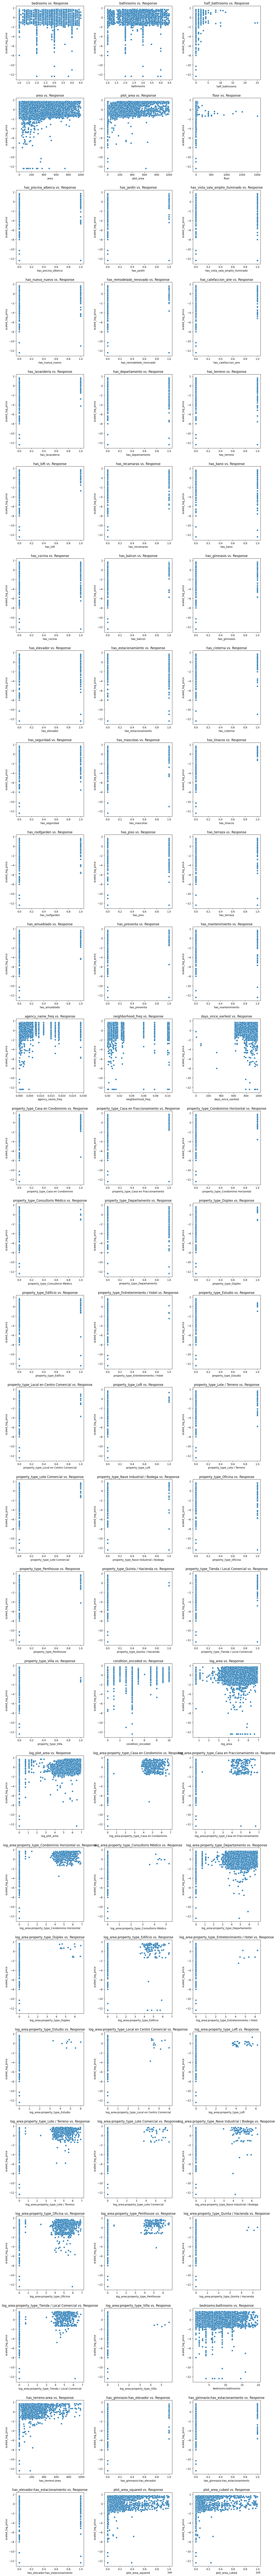

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

n = len(X.columns)
ncols = 3  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Calculate required number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
fig.tight_layout(pad=5.0)

for i, column in enumerate(X.columns):
    r, c = divmod(i, ncols)
    sns.scatterplot(x=X[column], y=y, ax=axes[r, c])
    axes[r, c].set_title(f"{column} vs. Response")

plt.show()


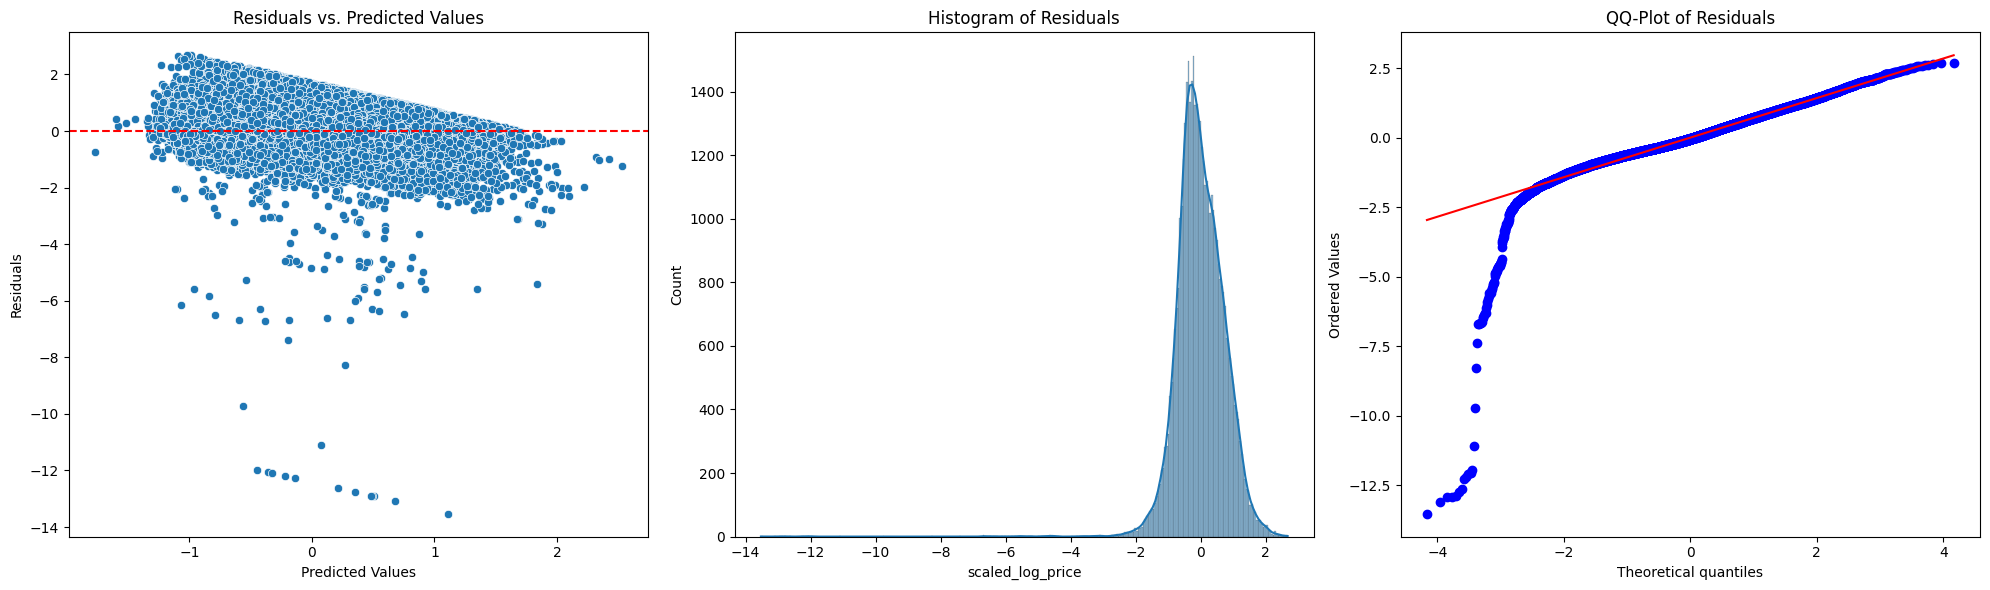

In [482]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Fit a basic linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Residuals vs. Predicted
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title("Residuals vs. Predicted Values")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Residuals")

# QQ-plot of residuals
stats.probplot(residuals, plot=axes[2])
axes[2].set_title("QQ-Plot of Residuals")

plt.tight_layout()
plt.show()


In [483]:
from unidecode import unidecode

X_train.columns = [unidecode(col) for col in X_train.columns]
X_test.columns = [unidecode(col) for col in X_test.columns]
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9]', '_')
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9]', '_')

In [484]:
def rename_columns(df):
    return df.rename(columns=lambda x: re.sub('[^a-zA-Z0-9]', '_', x))

X_train = rename_columns(X_train)
X_test = rename_columns(X_test)

In [485]:
import re

def check_json_compatible(column_names):
    incompatible_columns = []
    for name in column_names:
        if not re.match("^[a-zA-Z0-9_]+$", name):
            incompatible_columns.append(name)
    return incompatible_columns

# Check the column names of X_train and X_test
incompatible_train = check_json_compatible(X_train.columns)
incompatible_test = check_json_compatible(X_test.columns)

if incompatible_train or incompatible_test:
    print("Incompatible columns found:")
    if incompatible_train:
        print(f"In X_train: {incompatible_train}")
    if incompatible_test:
        print(f"In X_test: {incompatible_test}")
else:
    print("All columns are JSON-compatible.")


All columns are JSON-compatible.


In [486]:
X.columns

Index(['bedrooms', 'bathrooms', 'half_bathrooms', 'area', 'plot_area', 'floor',
       'has_piscina_alberca', 'has_jardín', 'has_vista_sala_amplio_iluminado',
       'has_nueva_nuevo', 'has_remodelado_renovado', 'has_calefaccion_aire',
       'has_lavanderia', 'has_departamento', 'has_terreno', 'has_loft',
       'has_recamaras', 'has_bano', 'has_cocina', 'has_balcon', 'has_gimnasio',
       'has_elevador', 'has_estacionamiento', 'has_cisterna', 'has_seguridad',
       'has_mascotas', 'has_tinacos', 'has_roofgarden', 'has_piso',
       'has_terraza', 'has_amueblado', 'has_preventa', 'has_mantenimiento',
       'agency_name_freq', 'neighborhood_freq', 'days_since_earliest',
       'property_type_Casa en Condominio',
       'property_type_Casa en Fraccionamiento',
       'property_type_Condominio Horizontal',
       'property_type_Consultorio Médico', 'property_type_Departamento',
       'property_type_Dúplex', 'property_type_Edificio',
       'property_type_Entretenimiento / Hotel', 'pr

In [487]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'half_bathrooms', 'area', 'plot_area', 'floor',
       'has_piscina_alberca', 'has_jardin', 'has_vista_sala_amplio_iluminado',
       'has_nueva_nuevo', 'has_remodelado_renovado', 'has_calefaccion_aire',
       'has_lavanderia', 'has_departamento', 'has_terreno', 'has_loft',
       'has_recamaras', 'has_bano', 'has_cocina', 'has_balcon', 'has_gimnasio',
       'has_elevador', 'has_estacionamiento', 'has_cisterna', 'has_seguridad',
       'has_mascotas', 'has_tinacos', 'has_roofgarden', 'has_piso',
       'has_terraza', 'has_amueblado', 'has_preventa', 'has_mantenimiento',
       'agency_name_freq', 'neighborhood_freq', 'days_since_earliest',
       'property_type_Casa_en_Condominio',
       'property_type_Casa_en_Fraccionamiento',
       'property_type_Condominio_Horizontal',
       'property_type_Consultorio_Medico', 'property_type_Departamento',
       'property_type_Duplex', 'property_type_Edificio',
       'property_type_Entretenimiento___Hotel', 'pr

In [490]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from tqdm import tqdm

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=1000, max_features=0.7, max_depth=10, random_state=0),
    "Gradient Boosted Trees": GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, max_features=0.7, subsample=0.8, random_state=0),
    "XGBoost": xgb.XGBRegressor(
        colsample_bytree=0.7, 
        learning_rate=0.01, 
        max_depth=10, 
        n_estimators=1000, 
        subsample=0.8,
        alpha=0.1,
        reg_lambda=1,
        random_state=0
    ),
    "LightGBM": lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, num_leaves=1024, max_bin=255, colsample_bytree=0.7, subsample=0.8, reg_alpha=0.1, reg_lambda=1, random_state=0),
    "Stacking": StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=500, max_features=0.7, max_depth=5, random_state=0)),
        ('gbm', GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, max_features=0.7, subsample=0.8, random_state=0))
    ], final_estimator=LinearRegression())
}

# Initialize dictionaries to store results
results_mse = {}
results_r2 = {}

# Initialize the outer progress bar
with tqdm(total=len(models), desc="Overall Progress", position=0) as pbar1:
    # Train, predict, and evaluate each model
    for name, model in models.items():
        # Initialize the inner progress bar
        with tqdm(total=2, desc=f"Processing {name}", position=1, leave=False) as pbar2:
            # Fit the model
            model.fit(X_train, y_train)
            pbar2.update(1)

            # Make predictions
            predictions = model.predict(X_test)
            pbar2.update(1)

        # Calculate metrics
        error_mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store results
        results_mse[name] = error_mse
        results_r2[name] = r2

        # Update the outer progress bar
        pbar1.update(1)

Processing LightGBM:   0%|                                                                                                                                          | 0/2 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3697
[LightGBM] [Info] Number of data points in the train set: 30879, number of used features: 70
[LightGBM] [Info] Start training from score -0.002845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain


Processing LightGBM:  50%|█████████████████████████████████████████████████████████████████                                                                 | 1/2 [00:21<00:21, 21.26s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



Overall Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:08<00:00, 73.69s/it]


In [491]:
# Display results for MSE
print("MSE Results:")
for name, error in results_mse.items():
    print(f"{name}: MSE = {error:.2f}")

# Display results for R²
print("R² Results:")
for name, r2 in results_r2.items():
    print(f"{name}: R² = {r2:.2f}")

MSE Results:
Random Forest: MSE = 0.41
Gradient Boosted Trees: MSE = 0.31
XGBoost: MSE = 0.31
LightGBM: MSE = 0.34
Stacking: MSE = 0.35
R² Results:
Random Forest: R² = 0.57
Gradient Boosted Trees: R² = 0.68
XGBoost: R² = 0.68
LightGBM: R² = 0.65
Stacking: R² = 0.63
